In [86]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import datetime
import matplotlib.cbook as cbook
from datetime import datetime

In [8]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [30]:
df = pd.read_csv('sample_data.csv')

In [31]:
df.head()

,date,experience,device,visits,orders,revenue
0,1/1/2017,A,mobile,1844.0,27.0,1228.78
1,1/2/2017,A,mobile,12355.0,144.0,10224.32
2,1/3/2017,A,mobile,17083.0,212.0,14924.05
3,1/4/2017,A,mobile,22975.0,222.0,16023.06
4,1/5/2017,A,mobile,15539.0,200.0,13682.06


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 6 columns):
date          104 non-null object
experience    104 non-null object
device        104 non-null object
visits        104 non-null float64
orders        104 non-null float64
revenue       104 non-null float64
dtypes: float64(3), object(3)
memory usage: 102.7+ KB


In [33]:
df

,date,experience,device,visits,orders,revenue
0,1/1/2017,A,mobile,1844.0,27.0,1228.78
1,1/2/2017,A,mobile,12355.0,144.0,10224.32
2,1/3/2017,A,mobile,17083.0,212.0,14924.05
3,1/4/2017,A,mobile,22975.0,222.0,16023.06
4,1/5/2017,A,mobile,15539.0,200.0,13682.06
5,1/6/2017,A,mobile,15358.0,199.0,15992.81
6,1/7/2017,A,mobile,17518.0,215.0,15173.53
7,1/8/2017,A,mobile,15698.0,186.0,14282.76
8,1/9/2017,A,mobile,17656.0,215.0,15492.14
9,1/10/2017,A,mobile,14005.0,158.0,12393.43


In [34]:
df = df[0:104]

#### Comparing experience A and B regarding:
* visits
* orders
* revenue

In [35]:
df.groupby('experience').count()

,date,device,visits,orders,revenue
experience,,,,,
A,52,52,52,52,52
B,52,52,52,52,52


In [62]:
df['date'] = pd.to_datetime(df['date'])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
dfA = df[df['experience']=='A']

In [64]:
dfB = df[df['experience']=='B']

In [65]:
dfA.describe()

,visits,orders,revenue
count,52.000000,52.000000,52.000000
mean,12074.596154,231.076923,17182.390769
std,4514.438550,78.191531,5813.040528
min,791.000000,13.000000,1020.940000
25%,9082.500000,186.000000,14474.445000
50%,12552.000000,213.500000,16007.935000
75%,15403.250000,272.500000,20521.910000
max,22975.000000,385.000000,29982.590000


In [66]:
dfB.describe()

,visits,orders,revenue
count,52.000000,52.000000,52.000000
mean,12078.461538,232.307692,17343.815385
std,4510.006923,78.446569,6281.121436
min,824.000000,11.000000,658.790000
25%,9099.500000,186.750000,13460.392500
50%,12583.000000,221.000000,16858.430000
75%,15395.500000,290.750000,21499.787500
max,23186.000000,395.000000,32569.850000


### Overall, not a big difference between Experience A and B in visits, orders, or revenue

In [67]:
dfAmobile = dfA[dfA['device']== 'mobile']

In [95]:
dfAmobile.describe()

,visits,orders,revenue
count,26.000000,26.000000,26.000000
mean,15250.307692,185.192308,13692.568077
std,3490.888022,39.114211,3110.458002
min,1844.000000,27.000000,1228.780000
25%,14071.250000,173.500000,12331.817500
50%,15448.500000,194.000000,14563.830000
75%,16974.000000,206.750000,15464.645000
max,22975.000000,227.000000,17318.250000


In [68]:
dfAdesktop = dfA[dfA['device']=='desktop']

In [96]:
dfAdesktop.describe()

,visits,orders,revenue
count,26.000000,26.000000,26.000000
mean,8898.884615,276.961538,20672.213462
std,2900.365292,81.013816,5824.736486
min,791.000000,13.000000,1020.940000
25%,6775.000000,236.500000,17993.845000
50%,9192.500000,274.000000,20690.520000
75%,11139.750000,332.250000,24539.725000
max,13093.000000,385.000000,29982.590000


In [92]:
dfBmobile = dfB[dfB['device']== 'mobile']

In [100]:
dfBmobile.describe()

,visits,orders,revenue
count,26.000000,26.000000,26.000000
mean,15228.692308,186.346154,13460.325769
std,3527.100756,44.092577,3504.313475
min,1841.000000,19.000000,1846.700000
25%,14168.750000,175.500000,12032.042500
50%,15410.000000,188.000000,13678.480000
75%,17126.000000,211.750000,15257.907500
max,23186.000000,252.000000,18565.560000


In [93]:
dfBdesktop = dfB[dfB['device']=='desktop']

In [99]:
dfBdesktop.describe()

,visits,orders,revenue
count,26.000000,26.000000,26.000000
mean,8928.230769,278.269231,21227.305000
std,2900.287493,78.840374,6069.049103
min,824.000000,11.000000,658.790000
25%,6797.750000,237.500000,18335.807500
50%,9155.500000,291.500000,21771.325000
75%,11370.750000,328.750000,25179.082500
max,13058.000000,395.000000,32569.850000


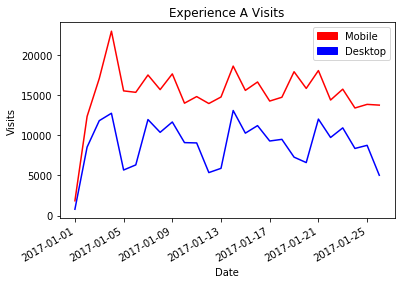

In [88]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.visits, color='b')
ax.plot(dfAmobile.date, dfAmobile.visits, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Visits')
ax.set_title('Experience A Visits');

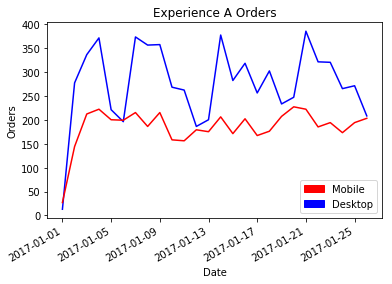

In [89]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.orders, color='b')
ax.plot(dfAmobile.date, dfAmobile.orders, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Orders')
ax.set_title('Experience A Orders');

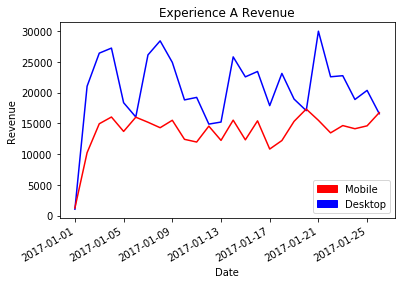

In [90]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.revenue, color='b')
ax.plot(dfAmobile.date, dfAmobile.revenue, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Revenue')
ax.set_title('Experience A Revenue');

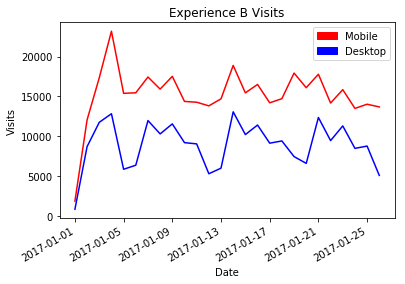

In [94]:
fig, ax = plt.subplots()
ax.plot(dfBdesktop.date, dfBdesktop.visits, color='b')
ax.plot(dfBmobile.date, dfBmobile.visits, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Visits')
ax.set_title('Experience B Visits');

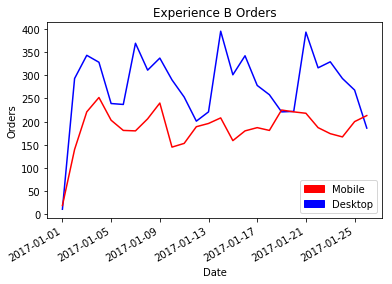

In [102]:
fig, ax = plt.subplots()
ax.plot(dfBdesktop.date, dfBdesktop.orders, color='b')
ax.plot(dfBmobile.date, dfBmobile.orders, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Orders')
ax.set_title('Experience B Orders');

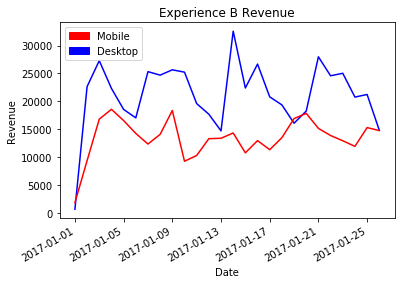

In [103]:
fig, ax = plt.subplots()
ax.plot(dfBdesktop.date, dfBdesktop.revenue, color='b')
ax.plot(dfBmobile.date, dfBmobile.revenue, color='r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Mobile')
blue_patch = mpatches.Patch(color='blue', label='Desktop')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Revenue')
ax.set_title('Experience B Revenue');

In [130]:
dfAdesktop

,date,experience,device,visits,orders,revenue
52,2017-01-01,A,desktop,791.0,13.0,1020.94
53,2017-01-02,A,desktop,8533.0,277.0,21027.74
54,2017-01-03,A,desktop,11827.0,336.0,26412.62
55,2017-01-04,A,desktop,12749.0,371.0,27233.61
56,2017-01-05,A,desktop,5679.0,221.0,18351.79
57,2017-01-06,A,desktop,6316.0,196.0,16028.95
58,2017-01-07,A,desktop,11967.0,373.0,26126.21
59,2017-01-08,A,desktop,10374.0,356.0,28411.12
60,2017-01-09,A,desktop,11662.0,357.0,24909.07
61,2017-01-10,A,desktop,9092.0,268.0,18806.54


In [131]:
dfBdesktop

,date,experience,device,visits,orders,revenue
78,2017-01-01,B,desktop,824.0,11.0,658.79
79,2017-01-02,B,desktop,8691.0,293.0,22637.45
80,2017-01-03,B,desktop,11741.0,343.0,27287.42
81,2017-01-04,B,desktop,12818.0,328.0,22314.40
82,2017-01-05,B,desktop,5844.0,239.0,18549.85
83,2017-01-06,B,desktop,6354.0,237.0,17035.03
84,2017-01-07,B,desktop,11963.0,369.0,25319.55
85,2017-01-08,B,desktop,10287.0,311.0,24696.13
86,2017-01-09,B,desktop,11544.0,337.0,25646.74
87,2017-01-10,B,desktop,9189.0,290.0,25229.28


In [132]:
dfAmobile

,date,experience,device,visits,orders,revenue
0,2017-01-01,A,mobile,1844.0,27.0,1228.78
1,2017-01-02,A,mobile,12355.0,144.0,10224.32
2,2017-01-03,A,mobile,17083.0,212.0,14924.05
3,2017-01-04,A,mobile,22975.0,222.0,16023.06
4,2017-01-05,A,mobile,15539.0,200.0,13682.06
5,2017-01-06,A,mobile,15358.0,199.0,15992.81
6,2017-01-07,A,mobile,17518.0,215.0,15173.53
7,2017-01-08,A,mobile,15698.0,186.0,14282.76
8,2017-01-09,A,mobile,17656.0,215.0,15492.14
9,2017-01-10,A,mobile,14005.0,158.0,12393.43


In [133]:
dfBmobile

,date,experience,device,visits,orders,revenue
26,2017-01-01,B,mobile,1841.0,19.0,1846.70
27,2017-01-02,B,mobile,12054.0,140.0,9369.64
28,2017-01-03,B,mobile,17335.0,221.0,16806.05
29,2017-01-04,B,mobile,23186.0,252.0,18565.56
30,2017-01-05,B,mobile,15381.0,203.0,16554.96
31,2017-01-06,B,mobile,15452.0,181.0,14248.15
32,2017-01-07,B,mobile,17431.0,180.0,12345.85
33,2017-01-08,B,mobile,15912.0,206.0,14077.77
34,2017-01-09,B,mobile,17517.0,240.0,18362.84
35,2017-01-10,B,mobile,14366.0,145.0,9260.19


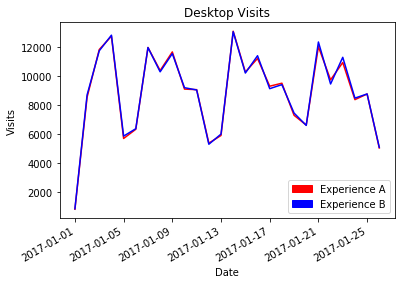

In [112]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.visits, color='r')
ax.plot(dfBdesktop.date, dfBdesktop.visits, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Visits')
ax.set_title('Desktop Visits');

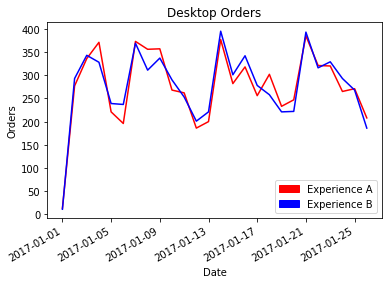

In [113]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.orders, color='r')
ax.plot(dfBdesktop.date, dfBdesktop.orders, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Orders')
ax.set_title('Desktop Orders');

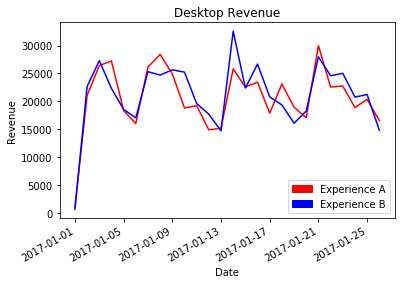

In [114]:
fig, ax = plt.subplots()
ax.plot(dfAdesktop.date, dfAdesktop.revenue, color='r')
ax.plot(dfBdesktop.date, dfBdesktop.revenue, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Revenue')
ax.set_title('Desktop Revenue');

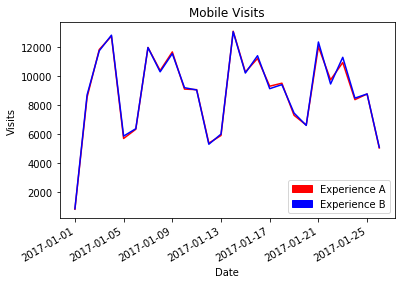

In [115]:
fig, ax = plt.subplots()
ax.plot(dfAmobile.date, dfAdesktop.visits, color='r')
ax.plot(dfBmobile.date, dfBdesktop.visits, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Visits')
ax.set_title('Mobile Visits');

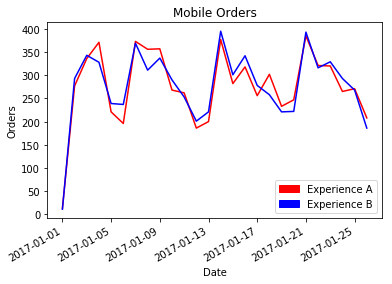

In [116]:
fig, ax = plt.subplots()
ax.plot(dfAmobile.date, dfAdesktop.orders, color='r')
ax.plot(dfBmobile.date, dfBdesktop.orders, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Orders')
ax.set_title('Mobile Orders');

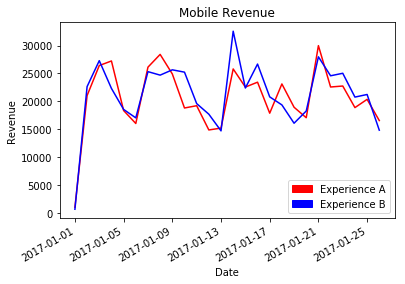

In [117]:
fig, ax = plt.subplots()
ax.plot(dfAmobile.date, dfAdesktop.revenue, color='r')
ax.plot(dfBmobile.date, dfBdesktop.revenue, color='b')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

red_patch = mpatches.Patch(color='red', label='Experience A')
blue_patch = mpatches.Patch(color='blue', label='Experience B')
plt.legend(handles=[red_patch, blue_patch])

ax.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.xlabel('Date')
plt.ylabel('Revenue')
ax.set_title('Mobile Revenue');

In [122]:
dfA['orders'].sum()

12016.0

In [123]:
dfB['orders'].sum()

12080.0

In [124]:
dfA['revenue'].sum()

893484.32

In [129]:
dfB['revenue'].sum()

901878.4000000001

## 2 Sample T-Tests with an alpha level set at 0.05

In [126]:
stats.ttest_ind(dfA['orders'], dfB['orders'])

Ttest_indResult(statistic=-0.08013003203177331, pvalue=0.9362908445039055)

In [128]:
stats.ttest_ind(dfA['revenue'], dfB['revenue'])

Ttest_indResult(statistic=-0.1360146294032797, pvalue=0.8920777952816139)

## Both resulting p-values are higher than the alpha, so we fail to reject the null hypothesis. These results are statistically insignificant. 